In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#name the current filepath
cwd = os.getcwd()
cwd

'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Projects\\ECHO-Marketing_git'

# iECHO (Attendance) Data

In [24]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
root_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\iECHO data\\' 
data_path_2018 = f'{root_file_path}2018_iECHO_data.csv' 
data_path_2019 = f'{root_file_path}2019_iECHO_data.csv' 
data_path_2020 = f'{root_file_path}2020_iECHO_data.csv' 
data_path_2021 = f'{root_file_path}2021_iECHO_data.csv' 
data_path_cumulative = f'{root_file_path}2018-2021_iECHO_attendance_data.csv'

# read the 2018-2021 data into separate dataframes
iecho_data_2018 = pd.read_csv(data_path_2018)
iecho_data_2019 = pd.read_csv(data_path_2019)
iecho_data_2020 = pd.read_csv(data_path_2020)
iecho_data_2021 = pd.read_csv(data_path_2021)
iecho_data_cumulative = pd.read_csv(data_path_cumulative)

# 2020 Attendance Totals

In [41]:
#clean 2020 data in preparation for merging all the dfs into one

#list 2020 data column headers
print(iecho_data_2020.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Date.1', 'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'COPY', 'COPY.1',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code',
       'Health Center County'],
      dtype='object')


In [42]:
#eliminate unnecessary columns
iecho_data_2020 = iecho_data_2020.drop(['Date.1',
                                        'First Name',
                                        'Last Name',
                                        'COPY',
                                        'COPY.1',
                                        'Health Center County',
                                       ], axis=1)

iecho_data_2020.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
0,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Alison Salyer,Attendee,Health Profession Student,MSW Intern,NaN,"301 N Mission St, PO Box 4403",Cascade,ID,83611,Valley / 4,ras18eg@my.fsu.edu,asalyer@cmchd.org,Cascade Medical Center,"402 Lake Cascade Pkwy, PO Box 1330",Cascade,ID,83611
1,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Amanda Wray,Attendee,Pharmacist,PharmD,Pain Management,98 Poplar St,Blackfoot,ID,83221,Bingham / 6,amwray@binghammemorial.org,NaN,Bingham Memorial Hospital,98 Poplar St,Blackfoot,ID,83221
2,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Andy Bradbury,Attendee,Physician,MD,Emergency Medicine,"525 S Center St, MS 3615",Rexburg,ID,83460-3615,Madison / 7,bradburya@byui.edu,NaN,BYU - Idaho,525 S Center St,Rexburg,ID,83460
3,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Annie Hawkins,Attendee,Nurse Practitioner,APRN,NaN,765 Osprey Cir,Hope,ID,83836,Bonner / 1,ahawkinsaprn@gmail.com,NaN,Guest - Hope,NaN,Hope,ID,83836
4,1/9/2020,"Opioids, Pain, and Substance Use Disorders",Exercise and Chronic Pain- Block 1,Barbara Norton,Attendee,Social Worker,LMSW,NaN,PO Box 172,Donnelly,ID,83615-0172,Valley / 4,barbaragnorton@yahoo.com,bnorton_tcc@yahoo.com,The Change Clinic,"454 W Roseberry Rd, Ste 104",Donnelly,ID,83615


In [43]:
# view the data
iecho_data_2020.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
count,7363,7363,7363,7363,7360,7360,6280,3021,6479,6510,6510,6510,7363,7363,546,7360,6153,7360,7360,7359
unique,101,9,97,1638,3,28,290,396,760,143,22,211,93,1644,63,655,533,179,30,189
top,3/24/2020,COVID-19,Patient Treatment Q & A,Lachelle Smith,Attendee,Physician,MD,Pharmacy,"450 W State St, PO Box 83720",Boise,ID,83702,Ada / 4,lachellesmith@uidaho.edu,echoidaho@uidaho.edu,University of Idaho - Boise,322 E Front St,Boise,ID,83702
freq,601,3046,600,104,6821,1375,1133,96,252,2277,6038,967,2938,104,77,422,428,2269,6044,1291


### Fill in Empty Values with NaNs

In [44]:
#print the column titles as a list
# print(iecho_data_2020.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2020 = iecho_data_2020[['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'Attendee Type',
       'Job Title', 'Credentials', 'Specialty', 'Attendee Street Address',
       'Attendee City', 'Attendee State', 'Attendee Zip Code',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2020['Clinic Name'].value_counts()

COVID-19                                        3046
Opioids, Pain, and Substance Use Disorders      1179
Behavioral Health in Primary Care               1153
COVID-19 Nursing Home Safety- Tuesday Cohort     654
Perinatal SUD                                    484
COVID-19 Ambulatory / Acute Care                 429
COVID-19 Nursing Home Safety- Friday Cohort      196
X-Waiver Training                                148
Syphilis in Pregnancy                             74
Name: Clinic Name, dtype: int64

### Change the Series Names

In [45]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2020['Clinic Name'].value_counts()

#convert 'Clinic Name' column to a string
# iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(str)

#change 'COVID-19' to 'COVID'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19', 'COVID')

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'COVID-19 Nursing Home Safety - Tuesday Cohort' to 'PALTC'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Nursing Home Safety- Tuesday Cohort', 'PALTC')

#change 'Perinatal SUD' to 'PSUD'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Perinatal SUD', 'PSUD')

#change 'COVID-19 Ambulatory / Acute Care' to 'COVID'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Ambulatory / Acute Care', 'COVID')

#change 'COVID-19 Nursing Home Safety - Friday Cohort' to 'PALTC'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Nursing Home Safety- Friday Cohort', 'PALTC')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

#change 'Syphilis in Pregnancy' to 'Syphilis'
iecho_data_2020['Clinic Name'] = iecho_data_2020['Clinic Name'].apply(lambda x: x.strip()).replace('Syphilis in Pregnancy', 'Syphilis')

iecho_data_2020['Clinic Name'].value_counts()

# create a df that will show the attendance count by session

COVID       3475
OPSUD       1179
BH in PC    1153
PALTC        850
PSUD         484
XWT          148
Syphilis      74
Name: Clinic Name, dtype: int64

### Create a Session Attendance Dataframe

In [46]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2020 = iecho_data_2020[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2020.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2020_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2020_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2020_df.reset_index(inplace=True)

session_attendance_2020_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,Alcohol Addiction- Block 2,8/5/2020,52
1,BH in PC,Cannabis and CBD- Block 1,5/20/2020,77
2,BH in PC,"Choosing the ""Right"" Antidepressant",10/21/2020,45
3,BH in PC,Clinical Applications of Cognitive Behavioral ...,3/18/2020,43
4,BH in PC,Concussion and Mental Health: Pt I,9/2/2020,46
5,BH in PC,Concussion and Mental Health: Pt II,9/16/2020,40
6,BH in PC,De-Escalation- Block 1,4/15/2020,72
7,BH in PC,EMDR (Eye Movement Desensitization and Reproce...,6/3/2020,65
8,BH in PC,Esketamine- Block 2,7/1/2020,45
9,BH in PC,Facing a Pandemic: Behavioral Health in the Ti...,5/6/2020,59


### Convert the Datatypes

In [47]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2020_df.dtypes
session_attendance_2020_df['Date'] = pd.to_datetime(session_attendance_2020_df['Date'], format='%m/%d/%Y')
# session_attendance_2020_df.dtypes

#reorder the df
session_attendance_2020_df = session_attendance_2020_df.sort_values(by='Date')

### Plot the 2020 Attendance Totals

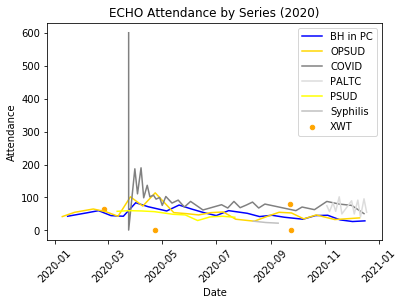

In [48]:
#plot the 2020 session attendance data using a multi-line graph

#slice the 2020 df by series
BH_PC_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2020 = BH_PC_attendance_2020['Date'].to_list()
bhpc_attendance_2020 = BH_PC_attendance_2020['Attendance'].to_list()

OPSUD_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2020 = OPSUD_attendance_2020['Date'].to_list()
OPSUD_attendance_2020 = OPSUD_attendance_2020['Attendance'].to_list()

XWT_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'XWT')]
XWT_date_2020 = XWT_attendance_2020['Date'].to_list()
XWT_attendance_2020 = XWT_attendance_2020['Attendance'].to_list()

COVID_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'COVID')]
COVID_date_2020 = COVID_attendance_2020['Date'].to_list()
COVID_attendance_2020 = COVID_attendance_2020['Attendance'].to_list()

PALTC_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'PALTC')]
PALTC_date_2020 = PALTC_attendance_2020['Date'].to_list()
PALTC_attendance_2020 = PALTC_attendance_2020['Attendance'].to_list()

PSUD_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'PSUD')]
PSUD_date_2020 = PSUD_attendance_2020['Date'].to_list()
PSUD_attendance_2020 = PSUD_attendance_2020['Attendance'].to_list()

syphilis_attendance_2020 = session_attendance_2020_df.loc[(session_attendance_2020_df['Clinic Name'] == 'Syphilis')]
syphilis_date_2020 = syphilis_attendance_2020['Date'].to_list()
syphilis_attendance_2020 = syphilis_attendance_2020['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2020, bhpc_attendance_2020, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2020, OPSUD_attendance_2020, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2020, XWT_attendance_2020, label = "XWT", s=20, color='orange')

plt.plot(COVID_date_2020, COVID_attendance_2020, label = "COVID", color = 'gray')
plt.plot(PALTC_date_2020, PALTC_attendance_2020, label = "PALTC", color = 'gainsboro')
plt.plot(PSUD_date_2020, PSUD_attendance_2020, label = "PSUD", color = 'yellow')
plt.plot(syphilis_date_2020, syphilis_attendance_2020, label = "Syphilis", color = 'silver')

plt.title("ECHO Attendance by Series (2020)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()

### NOTE: 
Because the sessions listed below are either data errors or outliars, another graph was made removing them from the dataset.
 3-24-2020 COVID-19 "Emergency Preparedness" (1 attendee)
 3-24-2020 COVID-19 "Patient Treatment Q & A" (600 attendees)
 4-23-2020 XWT (1 attendee)
 9-24-2020 XWT (1 attendee)

In [49]:
#Drop the duplicate X-Waiver sessions and the COVID-19 session kickoff (outliar) and redraw the chart

session_attendance_sans_outliars = session_attendance_2020_df[session_attendance_2020_df['Attendance'] > 1]
session_attendance_sans_outliars = session_attendance_sans_outliars[session_attendance_sans_outliars['Attendance'] < 599]
#session_attendance_sans_outliars

### Plot the 2020 Attendance Totals Sans Outliars

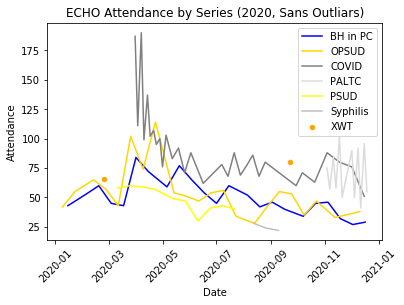

In [50]:
#plot the 2020 session attendance data using a multi-line graph

#slice the 2020 df by series
BH_PC_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'BH in PC')]
bhpc_date_2020 = BH_PC_attendance_2020['Date'].to_list()
bhpc_attendance_2020 = BH_PC_attendance_2020['Attendance'].to_list()

OPSUD_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'OPSUD')]
OPSUD_date_2020 = OPSUD_attendance_2020['Date'].to_list()
OPSUD_attendance_2020 = OPSUD_attendance_2020['Attendance'].to_list()

XWT_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'XWT')]
XWT_date_2020 = XWT_attendance_2020['Date'].to_list()
XWT_attendance_2020 = XWT_attendance_2020['Attendance'].to_list()

COVID_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'COVID')]
COVID_date_2020 = COVID_attendance_2020['Date'].to_list()
COVID_attendance_2020 = COVID_attendance_2020['Attendance'].to_list()

PALTC_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'PALTC')]
PALTC_date_2020 = PALTC_attendance_2020['Date'].to_list()
PALTC_attendance_2020 = PALTC_attendance_2020['Attendance'].to_list()

PSUD_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'PSUD')]
PSUD_date_2020 = PSUD_attendance_2020['Date'].to_list()
PSUD_attendance_2020 = PSUD_attendance_2020['Attendance'].to_list()

syphilis_attendance_2020 = session_attendance_sans_outliars.loc[(session_attendance_sans_outliars['Clinic Name'] == 'Syphilis')]
syphilis_date_2020 = syphilis_attendance_2020['Date'].to_list()
syphilis_attendance_2020 = syphilis_attendance_2020['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2020, bhpc_attendance_2020, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2020, OPSUD_attendance_2020, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2020, XWT_attendance_2020, label = "XWT", s=20, color='orange')

plt.plot(COVID_date_2020, COVID_attendance_2020, label = "COVID", color = 'gray')
plt.plot(PALTC_date_2020, PALTC_attendance_2020, label = "PALTC", color = 'gainsboro')
plt.plot(PSUD_date_2020, PSUD_attendance_2020, label = "PSUD", color = 'yellow')
plt.plot(syphilis_date_2020, syphilis_attendance_2020, label = "Syphilis", color = 'silver')

plt.title("ECHO Attendance by Series (2020, Sans Outliars)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()